# Dataset Description

Our dataset is partitioned into two subsets: training and testing. Each subset contains information structured into eight columns.

- **Training Subset:** This subset is used to train the machine learning model. It consists of data organized into eight columns.

- **Testing Subset:** This subset is utilized to evaluate the performance of the trained model. It also comprises data structured into eight columns.

The variable of interest, 'sourcing cost,' is the eighth column in both subsets. Our objective is to forecast the sourcing cost values by developing a machine learning model trained on the training dataset and subsequently evaluating its performance on the testing dataset.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from ipywidgets import interact, Output, VBox
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing and Exploratory Data analysis

<i> To make it convenient, we have converted the .xlsx sheet to individual CSV files.</i>

In [2]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('DS_ML Coding Challenge Dataset.xlsx')

# Iterate over each sheet in the Excel file
for sheet_name in excel_file.sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Define the CSV filename for the current sheet
    csv_filename = f'{sheet_name}.csv'
    
    # Save the DataFrame to a CSV file
    df.to_csv(csv_filename, index=False)
    
    print(f'Saved {csv_filename}')


Saved Instructions.csv
Saved Training Dataset.csv
Saved Test Dataset.csv


In [3]:
df = pd.read_csv("Training Dataset.csv")
print(df.head(10))

  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   
5        NTM1           X1       A10           DIRECT        Large   
6        NTM2           X1       A19           DIRECT        Large   
7        NTM2           X1       A29           DIRECT        Small   
8        NTM3           X1       A18           RETAIL        Large   
9        NTM3           X2       A20           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02

### The dataset contains two column names that are quite similar. To enhance clarity and facilitate smoother processing, we'll modify one of them.

In [4]:
# Lets obesrver the differnt types of elements inside our tables to find suitable name for oour coloum 
columns = df.iloc[:, 5:]
# Iterate over each column
for column in columns:
    unique_elements = df[column].unique()
    print(f"Unique elements in column '{column}': {unique_elements}")


Unique elements in column 'Product Type': ['Powder' 'Liquid']
Unique elements in column 'Month of Sourcing': ['2021-05-01' '2020-10-01' '2020-12-01' '2021-02-01' '2020-11-01'
 '2020-09-01' '2021-03-01' '2021-01-01' '2021-04-01' '2020-07-01'
 '2020-08-01']
Unique elements in column 'Sourcing Cost': [1.015800e+01 1.342810e+02 1.245600e+01 ... 1.338500e+02 1.263047e+04
 3.705000e+03]


In [5]:
# From the above results we can see that the 6th coloum has 2 unique elements named Powder and Liquid.
df.rename(columns={'Product Type': 'Product State'}, inplace=True)

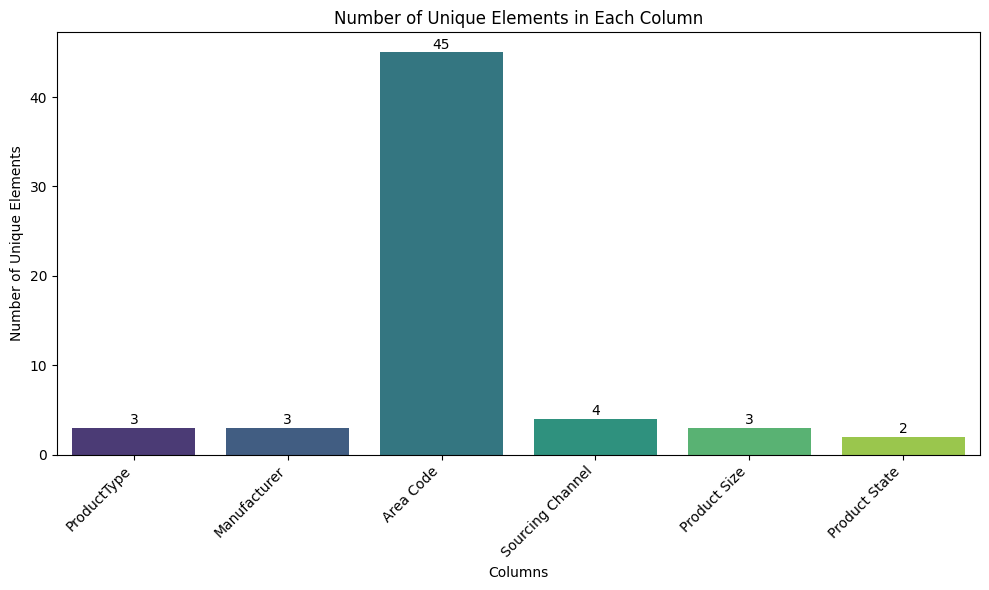

In [6]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Drop the last two columns from the copy
df_copy = df_copy.iloc[:, :-2]

# Get the count of unique elements in each column of the copy
unique_counts = df_copy.nunique()

# Plot the counts using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, hue=unique_counts.index, palette='viridis', legend=False)

# Add count text on top of each bar
for i, count in enumerate(unique_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Number of Unique Elements in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Elements')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of Graph Data
---
**From the above graph, it's notable that:**
- **All columns display nearly equal numbers of unique elements, except for the 'area code' column, which stands out with 45 unique elements.**


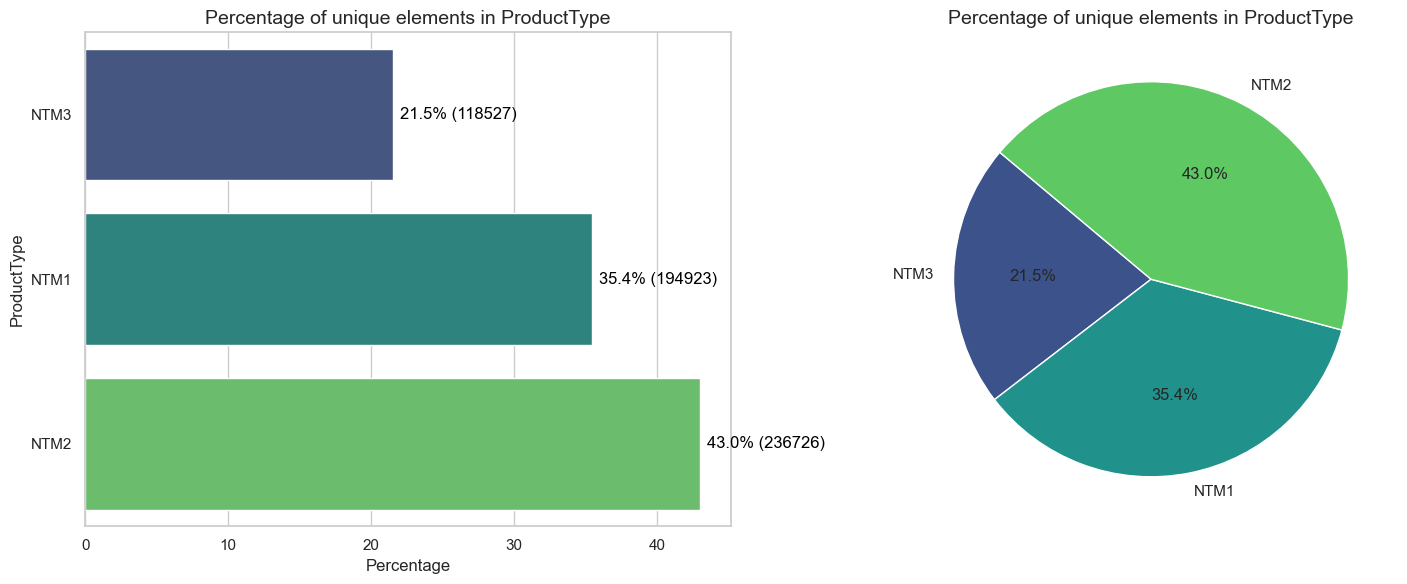

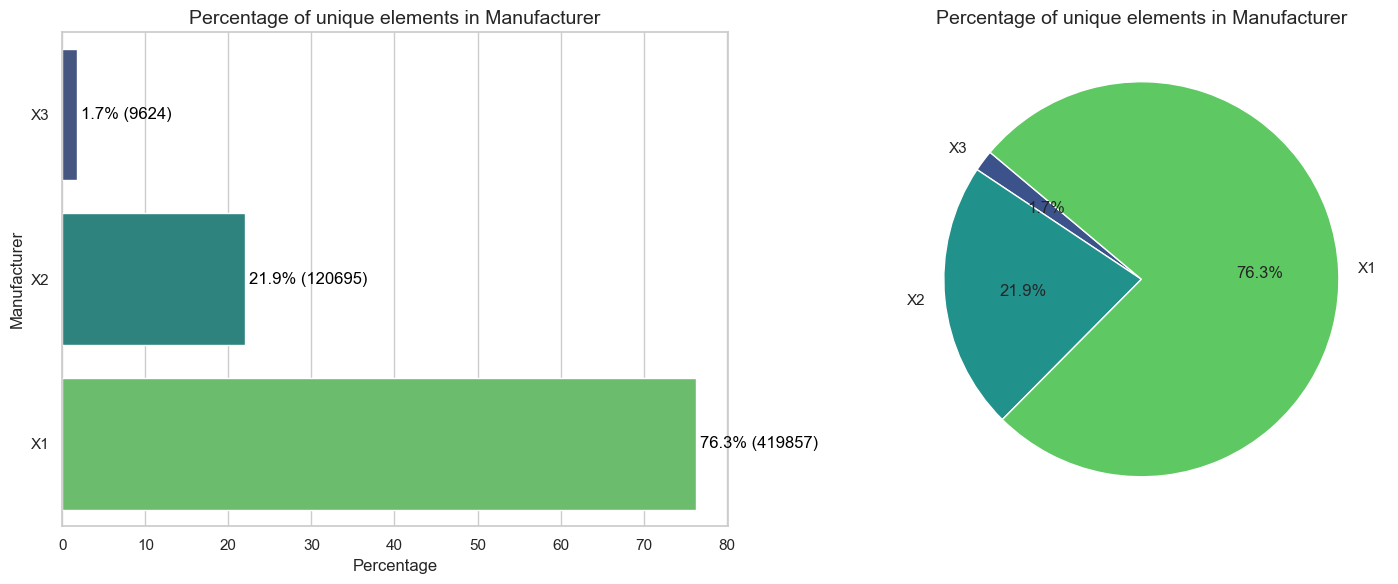

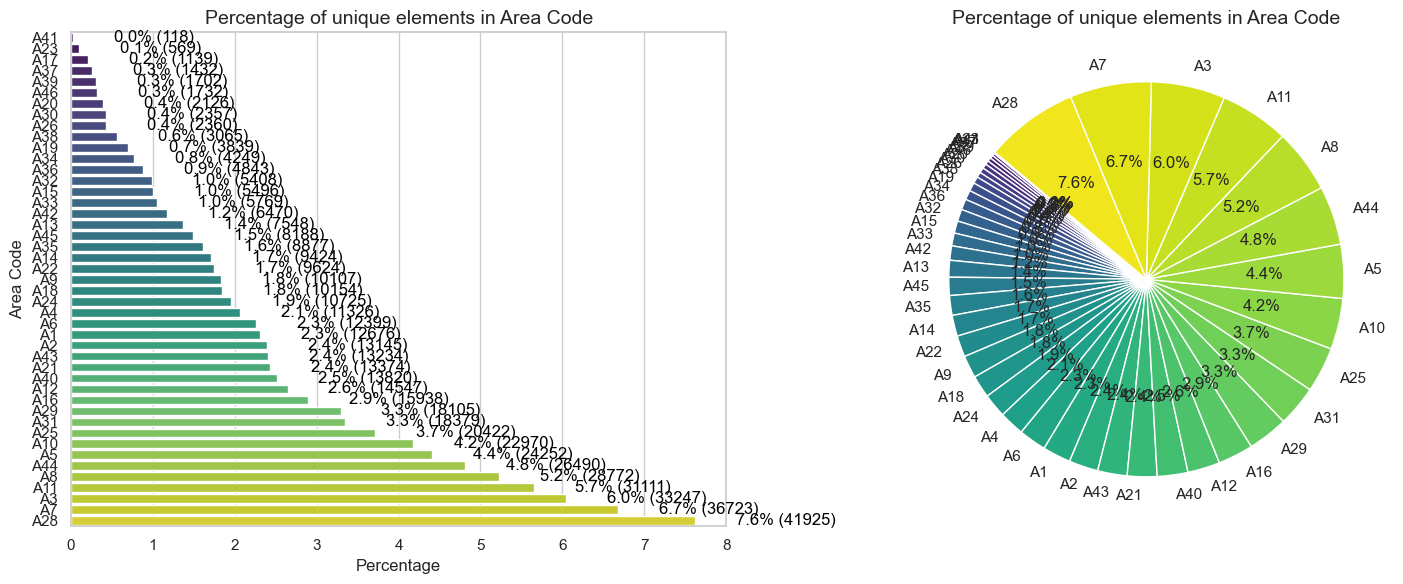

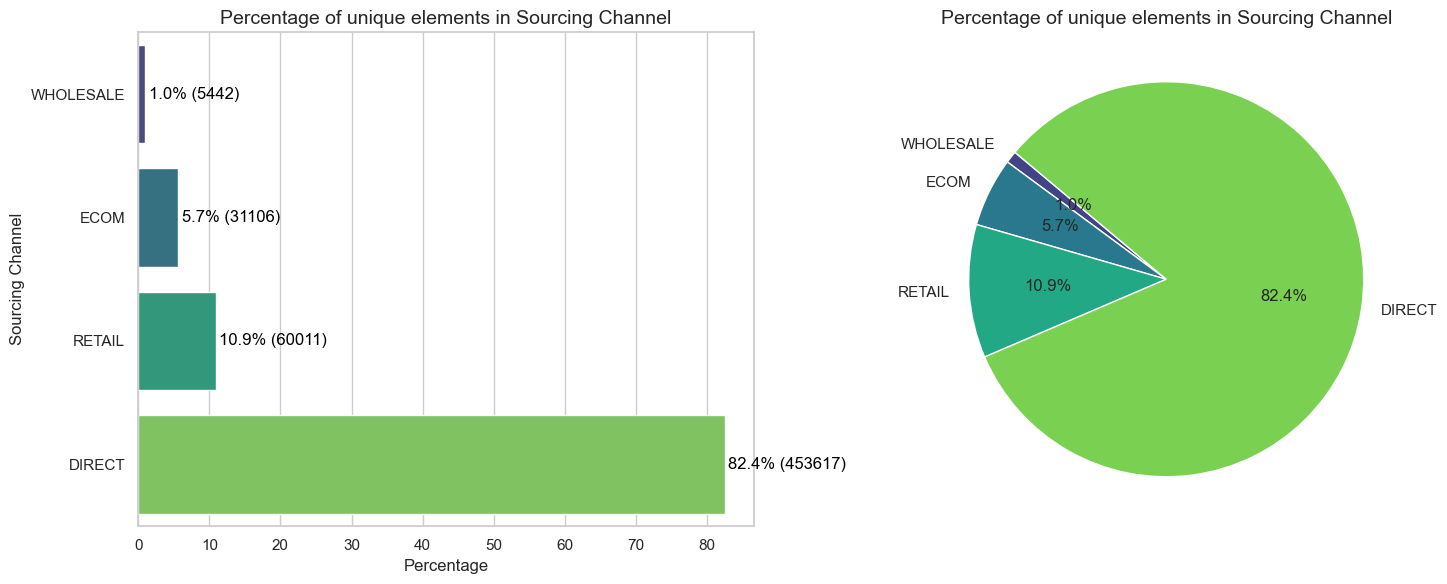

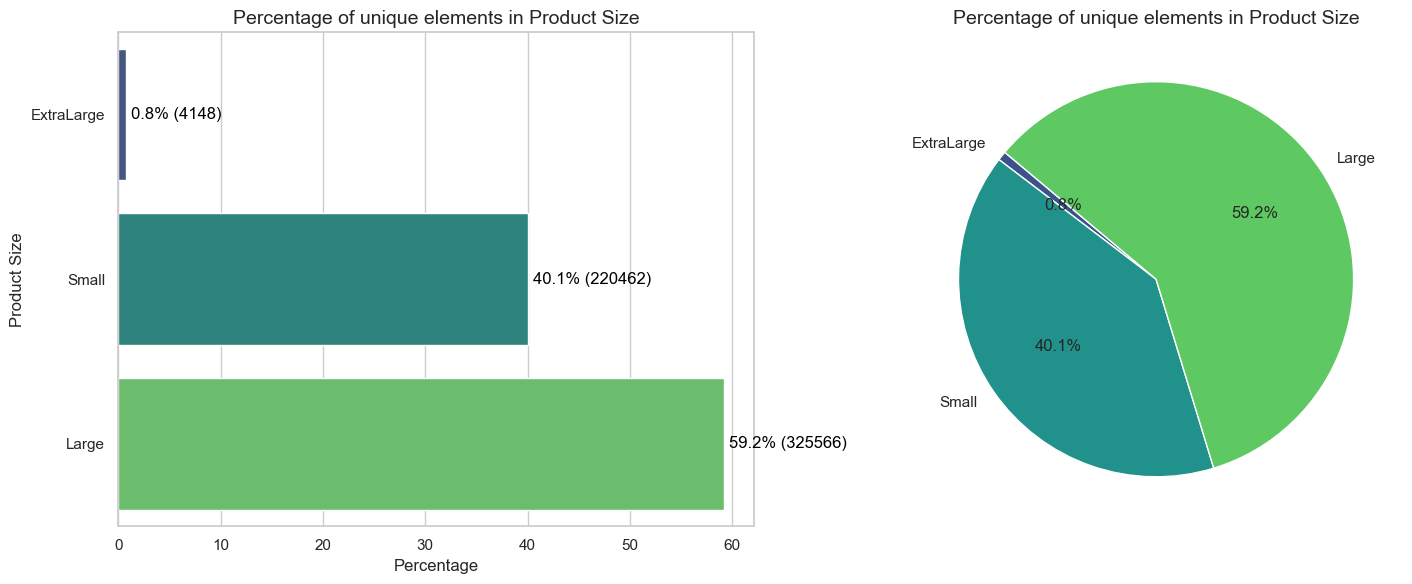

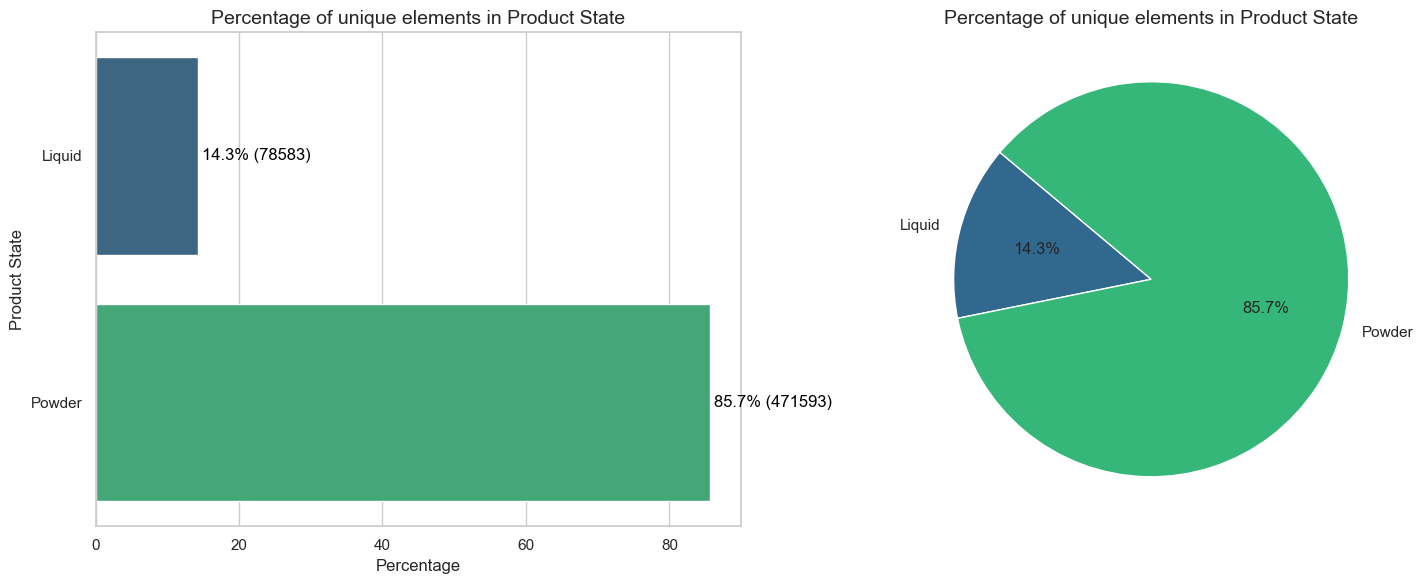

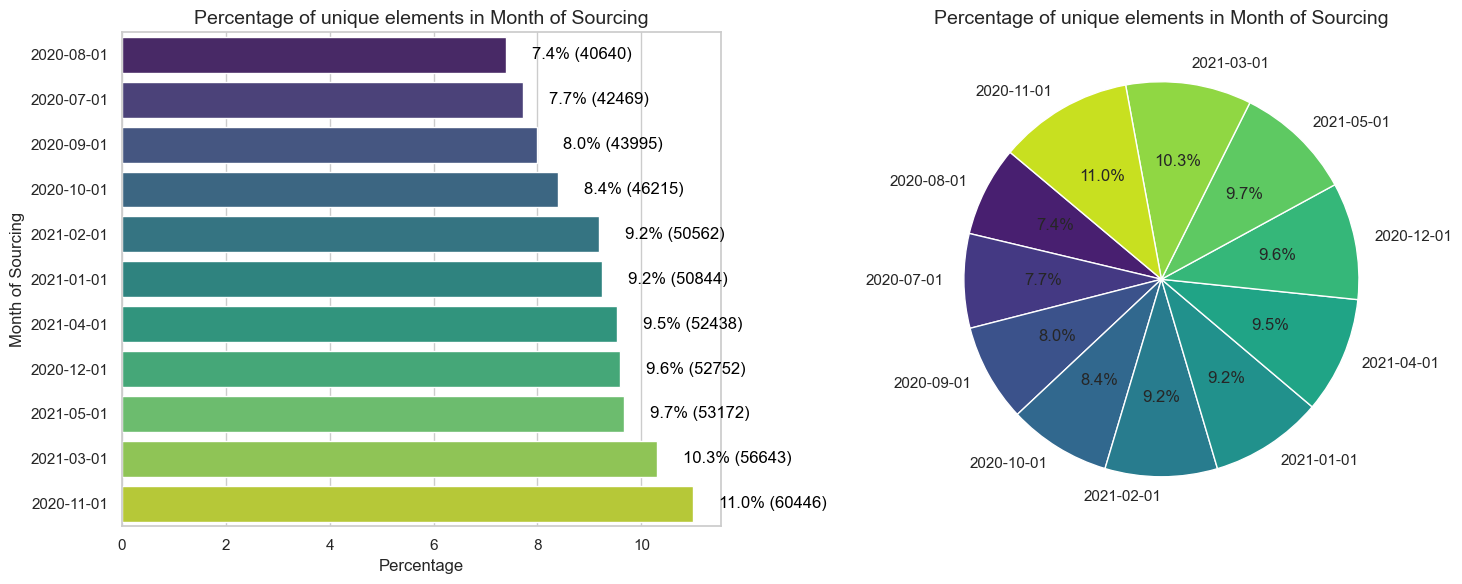

In [7]:
def plot_column_counts_all(df):
    sns.set(style="whitegrid")  # Set seaborn style
    
    for column_name in df.columns:
        counts = df[column_name].value_counts(normalize=True) * 100
        counts.sort_values(inplace=True)
        
        # Create subplots
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot bar chart
        sns.barplot(x=counts, y=counts.index, hue=counts.index, ax=axs[0], palette='viridis', dodge=False, legend=False)
        axs[0].set_xlabel('Percentage', fontsize=12)
        axs[0].set_ylabel(column_name, fontsize=12)
        axs[0].set_title(f'Percentage of unique elements in {column_name}', fontsize=14)
        
        # Add count values on bars
        for i, v in enumerate(counts):
            axs[0].text(v + 0.5, i, f'{v:.1f}% ({df[column_name].value_counts()[counts.index[i]]})', color='Black', va='center')

        # Plot pie chart
        axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(counts)))
        axs[1].set_title(f'Percentage of unique elements in {column_name}', fontsize=14)
        
        plt.tight_layout()
        plt.show()

# Call the function
df2=df.drop("Sourcing Cost", axis=1)
plot_column_counts_all(df2)


### Model Building and Comparison
---
**From the above graphs, it's evident that:**
- **Manufacturer X1 dominates the market with a substantial 76.3% share, while X3's contribution is merely 1.7%.**

- **In terms of sourcing channels, direct sourcing comprises the vast majority at 82.4%, with wholesale accounting for only 1%.**

- **Analysis of product sizes reveals that extra-large products constitute a negligible 0.8%.**
.8%.


<i></i>

In [8]:
print(df.dtypes)

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product State         object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object


<i>
The dataframe contains data represented as objects. To effectively apply machine learning algorithms, it's necessary to encode this data. Utilizing label encoding could introduce biases, potentially impacting the results. Therefore, we'll opt for one-hot encoding to represent categorical variables. Additionally, we'll convert the "Month of Sourcing" column into a datetime format for further analysis.</i>

In [9]:
def convert_to_datetime(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    return df
def one_hot_encode(df, columns_to_encode):
    df_encoded = pd.get_dummies(df, columns=columns_to_encode)
    return df_encoded    
columns_to_encode = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product State']
df = convert_to_datetime(df, 'Month of Sourcing')
df_encoded = one_hot_encode(df, columns_to_encode)
print(df_encoded.dtypes)

Month of Sourcing          datetime64[ns]
Sourcing Cost                     float64
ProductType_NTM1                     bool
ProductType_NTM2                     bool
ProductType_NTM3                     bool
                                ...      
Product Size_ExtraLarge              bool
Product Size_Large                   bool
Product Size_Small                   bool
Product State_Liquid                 bool
Product State_Powder                 bool
Length: 62, dtype: object


In [10]:
print(df.shape)
print(df_encoded.shape)

(550176, 8)
(550176, 62)


<i>One-hot encoding has expanded the number of columns, yet it has rendered the data more comprehensible for machine learning algorithms.</i>

## Let's explore potential correlations among the columns.

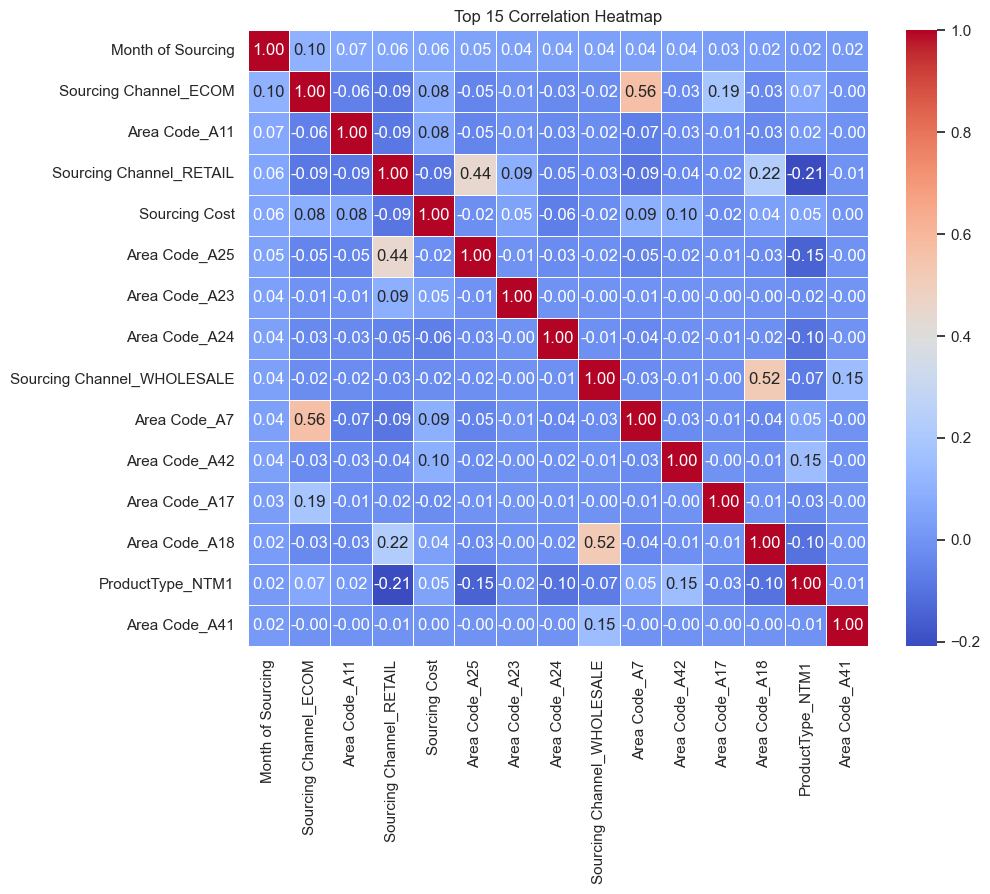

In [11]:
def plot_top_correlation_heatmap(df, top_n=15):
    corr_matrix = df.corr()
    # Get the top correlated columns
    top_corr_columns = corr_matrix.nlargest(top_n, df.columns).index
    top_corr_matrix = df[top_corr_columns].corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Top {top_n} Correlation Heatmap')
    plt.show()

# Example usage: plot the top 15 highest correlated columns
plot_top_correlation_heatmap(df_encoded, top_n=15)

### Correlation Analysis
---
**The heatmap generated using Correlation Thresholding reveals minimal correlation between the columns. This suggests that there's currently no immediate need to drop any columns before constructing the model.**


## let's investigate the presence of outliers in the data and devise strategies to address them.

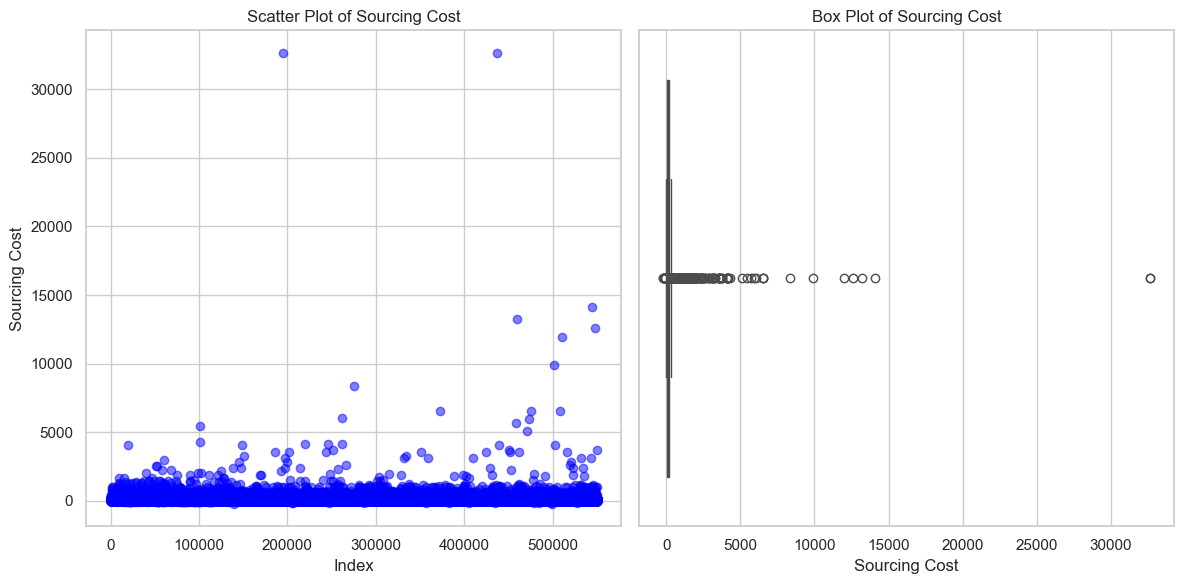

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Training Dataset.csv")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
axs[0].scatter(df.index, df['Sourcing Cost'], color='blue', alpha=0.5)
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Sourcing Cost')
axs[0].set_title('Scatter Plot of Sourcing Cost')

# Box plot
sns.boxplot(x=df['Sourcing Cost'], ax=axs[1])
axs[1].set_xlabel('Sourcing Cost')
axs[1].set_title('Box Plot of Sourcing Cost')

plt.tight_layout()
plt.show()


### Outlier Analysis and Thresholding
---
**Based on the graphs above, it's clear that outliers are present in the dataset. Now, let's devise a strategy to determine threshold values for their removal.**


</i>

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Training Dataset.csv")

# Calculate the first and third quartiles
Q1 = df['Sourcing Cost'].quantile(0.25)
Q3 = df['Sourcing Cost'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the lower and upper bounds
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)


Lower bound for outliers: -76.72049999999999
Upper bound for outliers: 279.86749999999995


In [14]:

threshold = 279  

# Count the number of elements below and above the threshold
below_threshold_count = df[df['Sourcing Cost'] < threshold].shape[0]
above_threshold_count = df[df['Sourcing Cost'] >= threshold].shape[0]

print(f"Number of elements below the threshold ({threshold}): {below_threshold_count}")
print(f"Number of elements above or equal to the threshold ({threshold}): {above_threshold_count}")


Number of elements below the threshold (279): 547519
Number of elements above or equal to the threshold (279): 2657


In [15]:

df = pd.read_csv("Training Dataset.csv")

# Define the threshold value
threshold = 279  # You can adjust this value as needed

# Filter the DataFrame to keep only rows below the threshold
df_filtered = df[df['Sourcing Cost'] < threshold]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv("Training Dataset.csv", index=False)


<i>With the preprocessing steps completed, we're ready to commence constructing our models.</i>

---
# Model Building and Comparision 
---

## Random Forest
---
**Random Forest, with its ensemble of decision trees, is effective for predicting "Sourcing Cost" due to its ability to handle non-linearity, feature importance analysis, and robustness to overfitting. It offers a balance between performance and interpretability, making it a suitable choice for regression tasks.**


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Read the datasets
train_data = pd.read_csv("Training Dataset.csv")
test_data = pd.read_csv("Test Dataset.csv")

# Separate features and target variable in the training dataset
X_train = train_data.drop("Sourcing Cost", axis=1)
y_train = train_data["Sourcing Cost"]

# Define preprocessing steps for categorical variables
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = model.predict(test_data)

# Print the predictions
print(predictions)


[108.93206242 160.53567617 149.91401564 146.03583415 166.72387201
 173.46525749  49.07584179  56.51859966 149.64949674 149.45555049
 149.75826886 133.3         95.         142.8446042  143.59755858
 156.25706257 165.33014833 142.19562413 142.02544776 149.82690996
 151.54223064 147.32509572 148.3188656   31.13021255  78.83834088
  41.30456518  18.80195827  31.47007853  24.66180225 194.35109651
 186.31711509 168.59370222  28.70026031  26.21741251  68.
 149.49507296 151.09057851 145.1746508  145.15441691  97.78567676
  59.7970025  111.40991672 172.27198668 172.95904964 109.69832563
  38.96798003 197.25286771 196.59447418  99.17871803  56.52002058
  56.52005222 149.15356393  92.84557993  61.99348868 183.04906566
 166.98318558 178.47175671 205.50513557 186.1607188  142.83483049
 140.98260328 149.77830792 149.66258374 142.97734601 143.13507154
 143.57393643 144.22528518 142.35963242 142.96868756 153.70297751
 149.03422462 114.4265502   73.66632651  64.36681909  13.79145996
  56.02829718  26.

In [2]:
# Read the test dataset
test_data = pd.read_csv("Test Dataset.csv")

# Add predicted values to test_data dataframe
test_data['Predicted_Sourcing_Cost'] = predictions

# Save the results to a new CSV file
test_data.to_csv("results_RandomForest.csv", index=False)

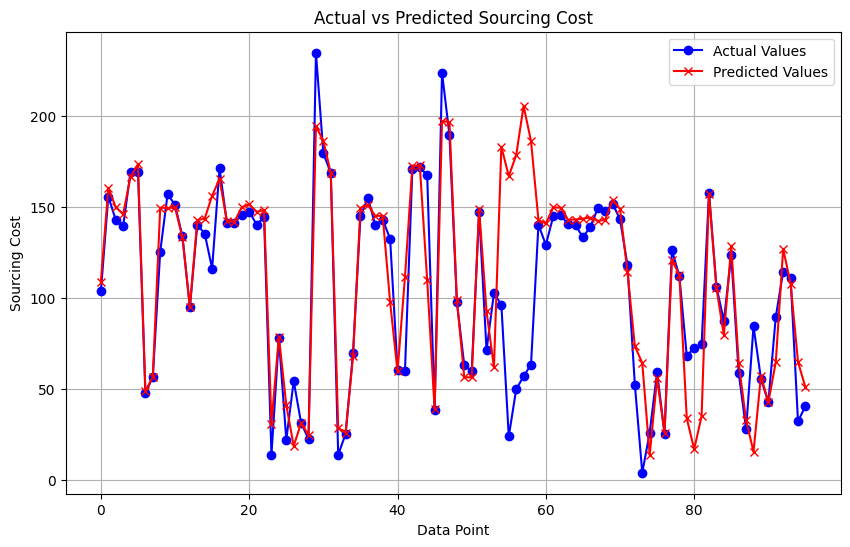

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with actual and predicted values
results = pd.read_csv("results_RandomForest.csv")

# Extract actual and predicted values
actual_values = results["Sourcing Cost"]
predicted_values = results["Predicted_Sourcing_Cost"]

# Plot the line plot with markers
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.plot(predicted_values, label='Predicted Values', color='red', marker='x', linestyle='-')
plt.title('Actual vs Predicted Sourcing Cost')
plt.xlabel('Data Point')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


### Model Performance Analysis
---
**Observing the graph above, it's apparent that the model generally performs well. However, there are instances where the predicted values deviate significantly from the actual values, particularly at points 14, 27, and within the range of 55 to 60.**


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 17.3272423773652
Mean Squared Error (MSE): 1204.1157740011583
R-squared (R2) Score: 0.5561613067111582


## GBMRegressor
---
**GBMRegressor, employing gradient boosting, excels in predicting "Sourcing Cost" through iterative refinement of predictions, capturing intricate relationships, and offering valuable insights into feature importance. Its ensemble methodology effectively addresses overfitting concerns while delivering superior performance and interpretability, rendering it highly suitable for regression tasks.**


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Step 2: Load Data
train_data = pd.read_csv("Training Dataset.csv")
test_data = pd.read_csv("Test Dataset.csv")

# Step 3: Preprocessing
# Concatenate train and test data to ensure they have the same columns after one-hot encoding
all_data = pd.concat([train_data.drop(columns=['Sourcing Cost']), test_data.drop(columns=['Sourcing Cost'])], axis=0)

# Convert categorical variables to numerical using one-hot encoding
all_data = pd.get_dummies(all_data)

# Split back into train and test data
X_train = all_data[:len(train_data)]
X_test = all_data[len(train_data):]

y_train = train_data['Sourcing Cost']

# Step 4: Train-Test Split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 5: Model Training
lgbm_model = LGBMRegressor()

# Step 6: Hyperparameter Tuning
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_split, y_train_split)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 7: Prediction
best_lgbm_model = LGBMRegressor(**best_params)
best_lgbm_model.fit(X_train, y_train)
predictions = best_lgbm_model.predict(X_test)

# Output predictions
test_data['Predicted Sourcing Cost'] = predictions
test_data.to_csv("Test Dataset Predictions.csv", index=False)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 440140, number of used features: 71
[LightGBM] [Info] Start training from score 108.881809
Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 50}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 550176, number of used features

In [3]:
import joblib
joblib.dump(best_lgbm_model, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions_data = pd.read_csv("Test Dataset Predictions.csv")
# Calculate evaluation metrics
mse = mean_squared_error(predictions_data['Sourcing Cost'], predictions_data['Predicted Sourcing Cost'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(predictions_data['Sourcing Cost'], predictions_data['Predicted Sourcing Cost'])
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 19.144379214438192
Mean Absolute Error (MAE): 11.155207969583335


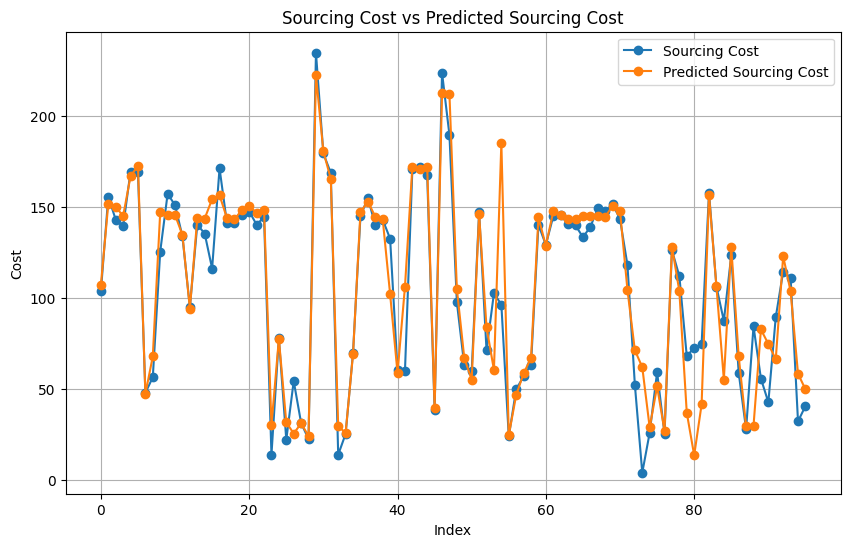

In [10]:
# Load the CSV file
predictions_data = pd.read_csv("Test Dataset Predictions.csv")

# Plot line plot for Sourcing Cost and Predicted Sourcing Cost
plt.figure(figsize=(10, 6))
plt.plot(predictions_data.index, predictions_data['Sourcing Cost'], label='Sourcing Cost', marker='o')
plt.plot(predictions_data.index, predictions_data['Predicted Sourcing Cost'], label='Predicted Sourcing Cost', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Sourcing Cost vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


### Model Performance Comparison
---
***Observing the graph above, it's evident that the model outperforms Random Forest. The predicted values are consistently closer to the actual values, indicating superior performance. However, a notable deviation is observed at point655, where the predicted value significantly diverges from the actual valu*e.**


## LSTM
---
**LSTM (Long Short-Term Memory) models are effective for predicting "Sourcing Cost" by capturing sequential patterns, handling temporal dependencies, and accommodating non-linear relationships. Their ability to learn from long sequences and remember past information makes them suitable for time series forecasting tasks, offering high performance in capturing complex dynamics.**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the datasets
train_data = pd.read_csv("Training Dataset.csv")
test_data = pd.read_csv("Test Dataset.csv")

# Drop unnecessary columns
train_data = train_data.drop(columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])
test_data = test_data.drop(columns=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type'])

# Convert 'Month of Sourcing' column to datetime
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'])
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'])

# Set 'Month of Sourcing' as index
train_data.set_index('Month of Sourcing', inplace=True)
test_data.set_index('Month of Sourcing', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define function to create sequences for LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 12 

# Create sequences for training and test data
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling for predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)


Epoch 1/25


C:\Users\ASUS\anaconda3\envs\Ap_Moller\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17110/17110 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 0.0161
Epoch 2/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0139
Epoch 3/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - loss: 0.0138
Epoch 4/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0138
Epoch 5/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.0138
Epoch 6/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 0.0138
Epoch 7/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 0.0138
Epoch 8/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0138
Epoch 9/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 0.0138
Epoch 10/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 0.0138
Epoch 11/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 0.0138
Epoch 12/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0138
Epoch 13/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 0.0138
Epoch 14/25
17110/17110 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 0.013

In [3]:
# Save the updated test data with predictions to a CSV file
test_data.to_csv("resultslstm.csv")


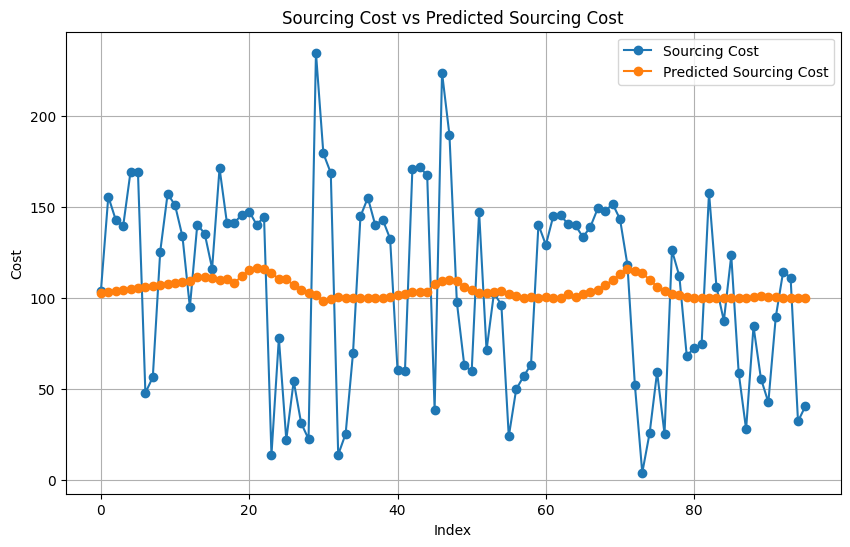

In [7]:
# Load the CSV file
predictions_data = pd.read_csv("resultslstm.csv")

# Plot line plot for Sourcing Cost and Predicted Sourcing Cost
plt.figure(figsize=(10, 6))
plt.plot(predictions_data.index, predictions_data['Sourcing Cost'], label='Sourcing Cost', marker='o')
plt.plot(predictions_data.index, predictions_data['Predicted_Sourcing_Cost'], label='Predicted Sourcing Cost', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Sourcing Cost vs Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

# Results

Model		R^2 Score	RMSE		MAE		MAPE
RandomForest	0.5562		34.7004		17.3272		44.4040
GBM Regressor	0.8649		19.1444		11.1552		30.0450
LSTM		0.0033		51.9993		45.1258		104.9277


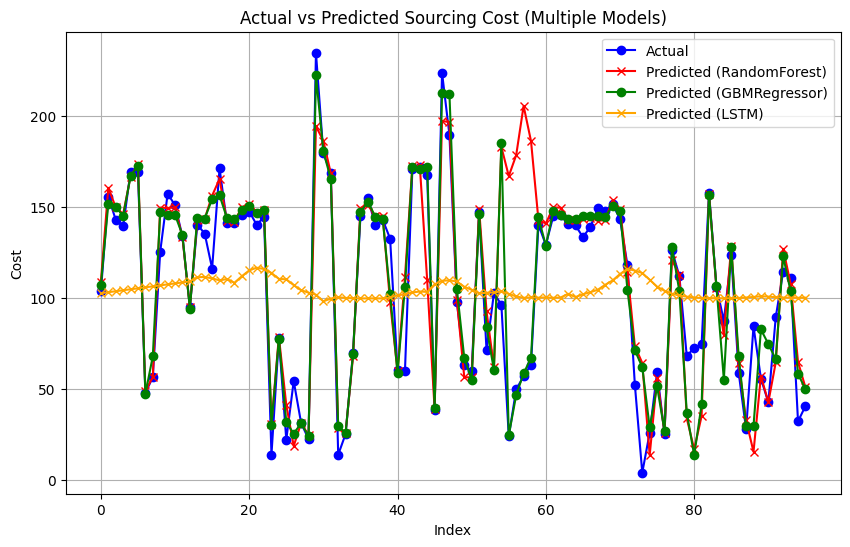

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load the datasets
results_rf = pd.read_csv("results_RandomForest.csv")
predictions_data_test = pd.read_csv("Test Dataset Predictions.csv")
predictions_data_lstm = pd.read_csv("resultslstm.csv")

# Calculate metrics for RandomForest model
r2_rf = r2_score(results_rf["Sourcing Cost"], results_rf["Predicted_Sourcing_Cost"])
rmse_rf = np.sqrt(mean_squared_error(results_rf["Sourcing Cost"], results_rf["Predicted_Sourcing_Cost"]))
mae_rf = mean_absolute_error(results_rf["Sourcing Cost"], results_rf["Predicted_Sourcing_Cost"])
mape_rf = np.mean(np.abs((results_rf["Sourcing Cost"] - results_rf["Predicted_Sourcing_Cost"]) / results_rf["Sourcing Cost"])) * 100

# Calculate metrics for Test Dataset Predictions model
rmse_test = np.sqrt(mean_squared_error(predictions_data_test['Sourcing Cost'], predictions_data_test['Predicted Sourcing Cost']))
r2_test = r2_score(predictions_data_test['Sourcing Cost'], predictions_data_test['Predicted Sourcing Cost'])
mae_test = mean_absolute_error(predictions_data_test['Sourcing Cost'], predictions_data_test['Predicted Sourcing Cost'])
mape_test = np.mean(np.abs((predictions_data_test['Sourcing Cost'] - predictions_data_test['Predicted Sourcing Cost']) / predictions_data_test['Sourcing Cost'])) * 100

# Calculate metrics for LSTM model
rmse_lstm = np.sqrt(mean_squared_error(predictions_data_lstm['Sourcing Cost'], predictions_data_lstm['Predicted_Sourcing_Cost']))
r2_lstm = r2_score(predictions_data_lstm['Sourcing Cost'], predictions_data_lstm['Predicted_Sourcing_Cost'])
mae_lstm = mean_absolute_error(predictions_data_lstm['Sourcing Cost'], predictions_data_lstm['Predicted_Sourcing_Cost'])
mape_lstm = np.mean(np.abs((predictions_data_lstm['Sourcing Cost'] - predictions_data_lstm['Predicted_Sourcing_Cost']) / predictions_data_lstm['Sourcing Cost'])) * 100

# Display comparative metrics
print("Model\t\tR^2 Score\tRMSE\t\tMAE\t\tMAPE")
print("RandomForest\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_rf, rmse_rf, mae_rf, mape_rf))
print("GBM Regressor\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_test, rmse_test, mae_test, mape_test))
print("LSTM\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_lstm, rmse_lstm, mae_lstm, mape_lstm))

# Plotting all data together
plt.figure(figsize=(10, 6))

# Plot actual values (only once as they are the same for all models)
plt.plot(results_rf.index, results_rf["Sourcing Cost"], label='Actual', color='blue', marker='o', linestyle='-')

# Plot predicted values for RandomForest model
plt.plot(results_rf.index, results_rf["Predicted_Sourcing_Cost"], label='Predicted (RandomForest)', color='red', marker='x', linestyle='-')

# Plot predicted values for Test Dataset Predictions model
plt.plot(predictions_data_test.index, predictions_data_test['Predicted Sourcing Cost'], label='Predicted (GBMRegressor)', color='green', marker='o', linestyle='-')

# Plot predicted values for LSTM model
plt.plot(predictions_data_lstm.index, predictions_data_lstm['Predicted_Sourcing_Cost'], label='Predicted (LSTM)', color='orange', marker='x', linestyle='-')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Actual vs Predicted Sourcing Cost (Multiple Models)')
plt.legend()
plt.grid(True)
plt.show()


# Results

In this project, I've developed a robust workflow that lays the groundwork for future development. Through careful analysis and experimentation, I've devised a system that efficiently handles data, detects outliers, and ensures data integrity. Additionally, I've evaluated various models and established an industry-standard model that yields results closely aligned with actual values.

## Key Achievements:

1. **Workflow Development:** Created a streamlined workflow to facilitate future project endeavors.
   
2. **Data Analysis:** Implemented a comprehensive system for studying data, detecting outliers, and ensuring data quality.
   
3. **Model Evaluation:** Conducted thorough evaluations of multiple models, ultimately selecting an industry-standard model that delivers highly accurate results.

By implementing these strategies, we've not only achieved accurate results but also established a solid foundation for continued progress and success in this project.


# Final Model Evaluation

Based on the evaluation metrics, the **GBM Regressor** emerges as the optimal model for the task. 

- **R^2 Score:** 0.8649
- **RMSE (Root Mean Squared Error):** 19.1444
- **MAE (Mean Absolute Error):** 11.1552
- **MAPE (Mean Absolute Percentage Error):** 30.0450

The GBM Regressor demonstrates the highest level of explanatory power among the models assessed, with an R^2 score of 0.8649. Furthermore, it yields the lowest RMSE and MAE, indicative of its superior accuracy in predicting continuous values. Notably, the GBM Regressor also exhibits the lowest MAPE, underscoring its effectiveness in minimizing percentage errors.

Thus, based on these comprehensive metrics, the GBM Regressor stands out as the most promising model for deployment in practical applications.
